5


c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


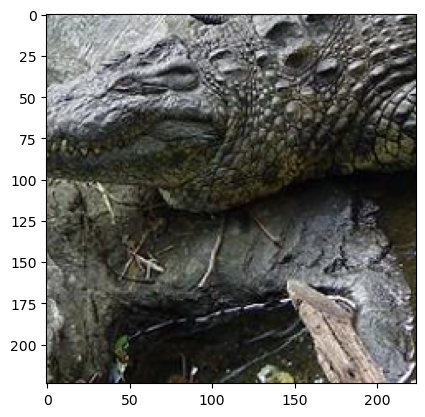

In [129]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from typing import Dict, Iterable, Callable
import numpy as np
from helper import makeGaussian, FeatureExtractor, fix_parameters, load_sta

from lucent.modelzoo import vgg19, util, inceptionv1_avgPool



#from lucent.modelzoo import inceptionv1
#incep_pretrained = inceptionv1(pretrained = True);
#incep_pretrained;


features_to_extract = [0,2,5,7,10,12,14,16,19,21,23,25,28,30,32,34]


for i in features_to_extract[2:3]:
    print(i)
    vgg_pretrained = vgg19(pretrained = True)
    ann = fix_parameters(vgg_pretrained)
    fe = FeatureExtractor(ann, layers = ['features.'+str(i)])
    break

In [158]:
im_tensor = torch.zeros(4, 3, 224, 224)
for i in range(1,5):
    im_test = plt.imread('E:/Jose/Data/THINGS_imgs/val/test/0000'+str(i)+'.bmp')
    im_test = np.transpose(im_test, (2, 0, 1))
    im_test = im_test[ : , 500-224:500, 100:100+224]
    print(i, '-', im_test.shape)
    im_tensor[i-1, :, :, :] = torch.Tensor(im_test)


1 - (3, 224, 224)
2 - (3, 224, 224)
3 - (3, 224, 224)
4 - (3, 224, 224)


In [160]:
r_test = fe(im_tensor)

In [162]:
r_test['features.5'].shape

torch.Size([4, 128, 112, 112])

In [164]:
torch.tensordot(r_test['features.5'], torch.rand(128, 112, 112, 43),  [[1,2,3],[0,1,2]]).shape

torch.Size([4, 43])

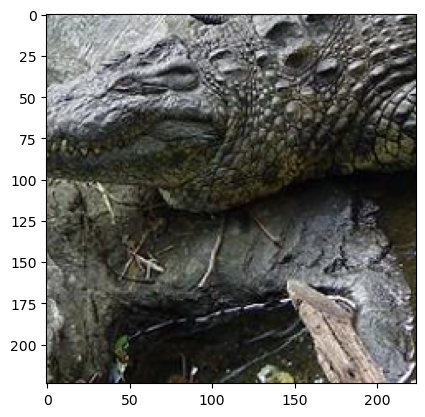

In [110]:
import matplotlib.pyplot as plt

im_test = plt.imread('E:/Jose/Data/THINGS_imgs/val/test/00001.bmp')
im_test.shape
im_test = im_test[500-224:500, 100:100+224, :]
plt.imshow(im_test)

In [112]:
dummy_input = torch.ones(1, 3, 224, 224)
import numpy as np
im_test = torch.Tensor(np.transpose(im_test, (2, 0, 1)))
im_tensor = torch.unsqueeze(im_test, 0)

print(im_tensor.shape)
result = fe(im_tensor)

print(result.keys())
print(result[list(result.keys())[0]].shape)

torch.Size([1, 3, 224, 224])
dict_keys(['features.5'])
torch.Size([1, 128, 112, 112])


In [200]:
class VggExtraction(nn.Module):

    def __init__(self, conv_layer = 0, num_neurons = 43):
        super(VggExtraction, self).__init__()

        self.vgg_pretrained = vgg19(pretrained = True)
        self.features_to_extract = [0,2,5,7,10,12,14,16,19,21,23,25,28,30,32,34]
        self.conv_layer = conv_layer
        assert self.conv_layer in self.features_to_extract
        ann = fix_parameters(vgg_pretrained)
        self.feature_extractor = FeatureExtractor(ann, layers = ['features.'+str(self.conv_layer)])

        dummy_input  = torch.ones(1, 3, 224, 224)
        dummy_output = self.extract_features(dummy_input)
        w_shape = list(dummy_output.shape[1:]) + [num_neurons]

        self.biases = torch.zeros(1, num_neurons)
        self.biases = nn.init.xavier_normal_(self.biases)

        self.w      = torch.zeros(w_shape)
        self.w      = nn.init.xavier_normal_(self.w)
        
        self.BN1 = nn.BatchNorm2d(num_features=w_shape[0])

    def extract_features(self, x):
        self.vgg_features = self.feature_extractor(x)
        print(self.vgg_features.keys())
        self.feature_number = list(self.vgg_features.keys())[0].split('.')[-1]
        return self.vgg_features[list(self.vgg_features.keys())[0]]

    def forward(self, x):
        x = self.extract_features(x)
        x = F.relu(self.BN1(x))
        x = torch.tensordot(x, self.w, [[1,2,3],[0,1,2]])
        x = x + self.biases
        return x


vgge = VggExtraction()

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.0'])


In [201]:
im_tensor.shape

torch.Size([4, 3, 224, 224])

In [203]:
vgge.forward(im_tensor).shape

dict_keys(['features.0'])


torch.Size([4, 43])

In [148]:
result['features.5'].shape

torch.Size([1, 128, 112, 112])

In [ ]:
torch.rand(128, 112, 112)

In [151]:

torch.tensordot(result['features.5'], torch.rand(128, 112, 112, 43), [[1,2,3],[0,1,2]]).shape

torch.Size([1, 43])

In [142]:
vgge.vgg_features['features.0'].shape

torch.Size([1, 64, 224, 224])

In [113]:
result.keys()

dict_keys(['features.5'])

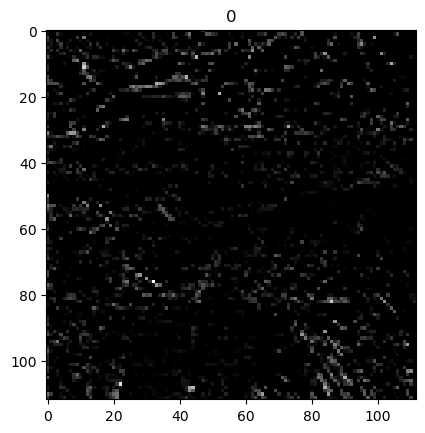

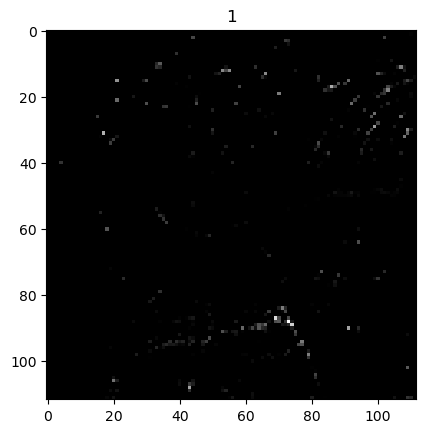

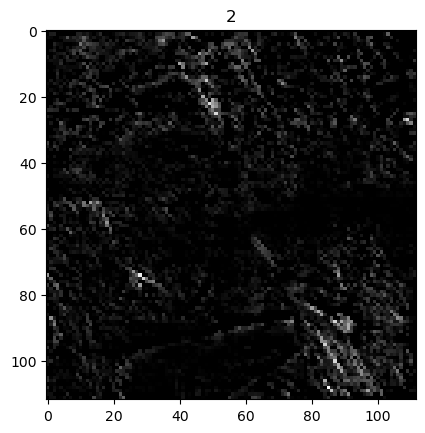

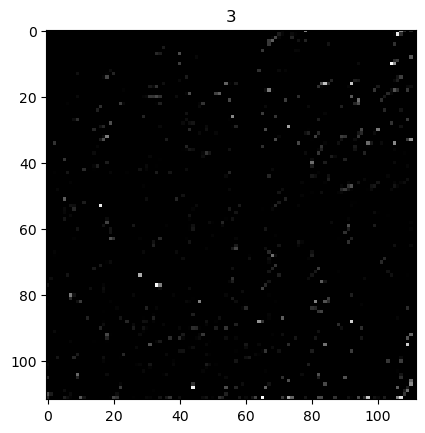

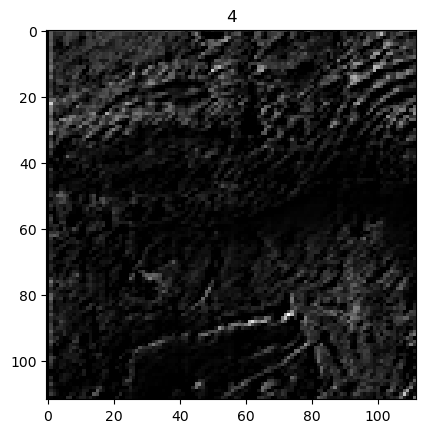

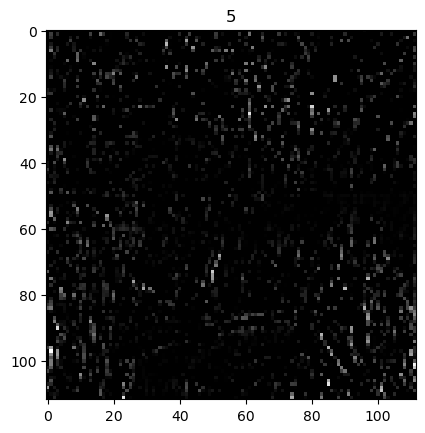

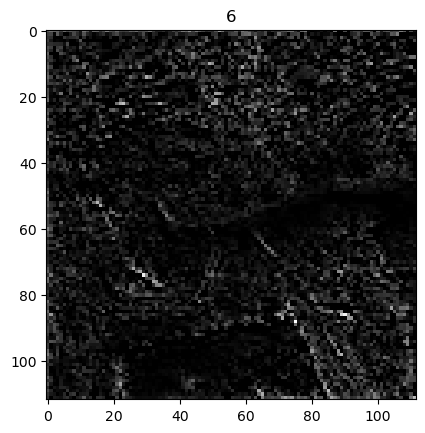

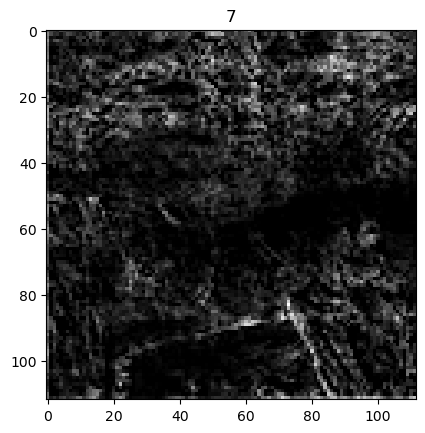

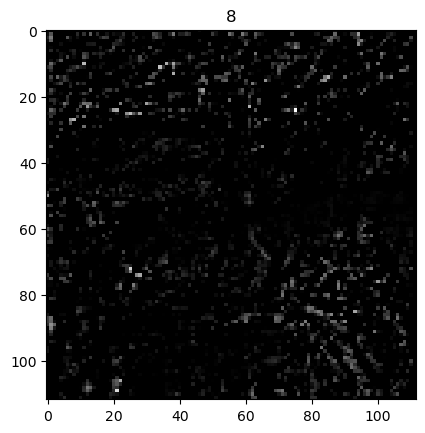

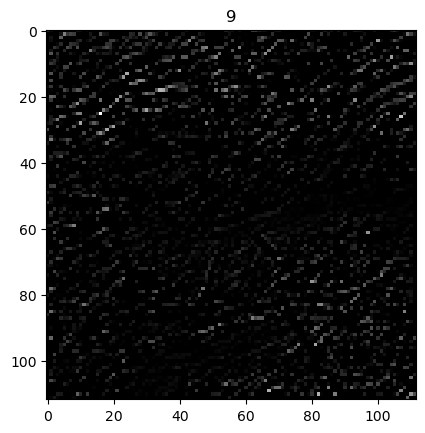

In [115]:
for i in range(10):
    plt.title(str(i))
    plt.imshow(result['features.5'][0,i,:,:], cmap = 'gray')
    plt.show()

In [118]:
x.shape

torch.Size([1, 128, 112, 112])

In [ ]:
nn.BatchNorm2d

In [193]:
print(result['features.5'].shape)
x =   result['features.5']
num_features = x.shape[1]
n = nn.Sequential(nn.BatchNorm2d(num_features=num_features), nn.ReLU())
n(x)

torch.Size([1, 128, 112, 112])


tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.4749e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [2.9708e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [2.2634e-01, 0.0000e+00, 0.0000e+00,  ..., 3.0005e+00,
           0.0000e+00, 0.0000e+00],
          [5.3069e+00, 2.5792e+00, 0.0000e+00,  ..., 3.0269e+00,
           0.0000e+00, 0.0000e+00],
          [2.3978e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           2.8344e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           2.5131e-01, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000

In [32]:
# Readout
def readout(inputs):
    s = inputs.shape
    print(s)
    w_readout = 


readout(n( mua = h5py.File('E:/Jose/Data/THINGS_exportMUA_array'+str(n)+'.mat')))

torch.Size([1, 64, 224, 224])


In [51]:
from array import array
import h5py
array_number = 9
mua = h5py.File('E:/Jose/Data/THINGS_exportMUA_array'+str(array_number)+'.mat')
print(array_number, ' :  ',  mua['train_MUA'].shape[1], '  - ', mua['train_MUA'].shape[1] == mua['test_MUA'].shape[1])
num_neurons = mua['train_MUA'].shape[1]

9  :   43   -  True


In [52]:
size = n(result['features.0']).shape
nn.init.xavier_normal(torch.zeros(size))
biases = torch.zeros(num_neurons)

C:\Users\lopez\AppData\Local\Temp\13\ipykernel_13588\253054201.py:2: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(torch.zeros(size))


torch.Size([43])

In [ ]:
#Deep convolutional models improve
#predictions of macaque V1 responses to
#natural images

#https://github.com/sacadena/Cadena2019PlosCB